In [3]:

import requests
from bs4 import BeautifulSoup
import pandas as pd

HOT_PLACES = ['강남 MICE 관광특구', '동대문 관광특구', '명동 관광특구', '이태원 관광특구', '잠실 관광특구', '종로·청계 관광특구', \
              '홍대 관광특구', '경복궁·서촌마을', '광화문·덕수궁', '창덕궁·종묘', '가산디지털단지역', '강남역', '건대입구역', \
              '고속터미널역', '교대역', '구로디지털단지역', '서울역', '선릉역', '신도림역', '신림역', '신촌·이대역', '역삼역', \
              '연신내역', '용산역', '왕십리역', 'DMC(디지털미디어시티)', '창동 신경제 중심지', '노량진', '낙산공원·이화마을', \
              '북촌한옥마을', '가로수길', '성수카페거리', '수유리 먹자골목', '쌍문동 맛집거리', '압구정로데오거리', '여의도', \
              '영등포 타임스퀘어', '인사동·익선동', '국립중앙박물관·용산가족공원', '남산공원', '뚝섬한강공원', '망원한강공원', \
              '반포한강공원', '북서울꿈의숲', '서울대공원', '서울숲공원', '월드컵공원', '이촌한강공원', '잠실종합운동장', '잠실한강공원']


API_KEY = "6b55696a7173633435394153694358"
datas = []
for hot in HOT_PLACES:
    url = f"http://openapi.seoul.go.kr:8088/{API_KEY}/xml/citydata/1/5/{hot}"
    
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html")
    items = soup.find_all("citydata")
    
    #print(items)
    
    for item in items:
        area_nm = item.find("area_nm").get_text() # 핫스팟 장소명
        live_ppltn_stts = item.find("live_ppltn_stts").get_text() # 실시간 인구현황
        area_congest_lvl = item.find("area_congest_lvl").get_text() # 장소 혼잡도 지표
        area_congest_msg = item.find("area_congest_msg").get_text() # 장소 혼잡도 지표 관련 메세지
        road_traffic_idx = item.find("road_traffic_idx").get_text() #전체 도로 소통 평균 현황
        
        data = [area_nm, live_ppltn_stts, area_congest_lvl, area_congest_msg, road_traffic_idx]
        datas.append(data)

In [5]:
data

['잠실한강공원',
 '여유사람이 몰려있을 가능성이 낮고 붐빔은 거의 느껴지지 않아요. 도보 이동이 자유로워요.3500400051.748.30.68.114.020.322.418.610.65.39.190.9N2023-05-02 18:45',
 '여유',
 '사람이 몰려있을 가능성이 낮고 붐빔은 거의 느껴지지 않아요. 도보 이동이 자유로워요.',
 '원활']

In [62]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import pandas as pd

In [49]:
data = {'District': ['Jongno-gu', 'Jung-gu', 'Yongsan-gu', 'Seongdong-gu', 'Gwangjin-gu', 'Dongdaemun-gu', 'Jungnang-gu', 'Seongbuk-gu', 'Gangbuk-gu', 'Dobong-gu', 'Nowon-gu', 'Eunpyeong-gu', 'Seodaemun-gu', 'Mapo-gu', 'Yangcheon-gu', 'Gangseo-gu', 'Guro-gu', 'Geumcheon-gu', 'Yeongdeungpo-gu', 'Dongjak-gu', 'Gwanak-gu', 'Seocho-gu', 'Gangnam-gu', 'Songpa-gu', 'Gangdong-gu'],
        '2000': [55174, 56619, 64335, 78922, 89113, 82441, 91090, 93099, 65993, 76403, 128509, 93431, 79413, 88768, 108350, 110662, 84234, 55091, 101472, 82843, 99223, 128749, 186168, 161085, 113262],
        '2005': [57001, 53398, 74257, 89751, 91202, 90799, 96525, 108492, 76483, 87645, 139545, 104675, 80887, 101400, 128813, 139479, 103482, 63110, 121287, 94488, 116240, 144840, 212393, 167522, 116759],
        '2010': [53043, 62836, 81514, 90979, 94698, 95106, 103258, 123315, 80318, 89883, 146241, 115729, 80496, 108045, 138019, 158121, 114445, 66583, 127671, 98034, 122310, 154204, 215398, 196836, 130439],
        '2015': [53031, 56470, 83496, 98329, 99183, 102996, 111936, 127190, 84325, 93388, 147747, 128342, 84648, 116054, 143945, 175903, 128294, 75325, 134955, 106116, 128081, 169230, 221867, 205698, 131858],
        '2020': [53472, 54841, 87636, 104962, 100774, 106231, 116603, 131711, 85754, 94279, 147426, 135193, 91857, 119639, 151129, 187762, 133120, 83335, 137754, 110369, 128471, 168678, 221196, 226800, 144860],
        '2021': [53339, 63506, 88363, 102131, 100915, 107187, 117311, 130222, 81003, 92946, 147653, 134628, 89819, 121467, 146724, 188972, 132388, 83959, 139838, 111350, 123707, 166138, 220975, 227035, 147977],
        '2022': [53098, 60758, 82765, 101907, 101583, 108327, 119241, 132072, 81400, 92600, 148210, 165549, 92192, 118022, 144059, 190859, 133973, 86298, 136451, 109862, 124549, 165969, 227803, 230070, 148961]
}

df = pd.DataFrame(data)
df

,District,2000,2005,2010,2015,2020,2021,2022
0,Jongno-gu,55174,57001,53043,53031,53472,53339,53098
1,Jung-gu,56619,53398,62836,56470,54841,63506,60758
2,Yongsan-gu,64335,74257,81514,83496,87636,88363,82765
3,Seongdong-gu,78922,89751,90979,98329,104962,102131,101907
4,Gwangjin-gu,89113,91202,94698,99183,100774,100915,101583
5,Dongdaemun-gu,82441,90799,95106,102996,106231,107187,108327
6,Jungnang-gu,91090,96525,103258,111936,116603,117311,119241
7,Seongbuk-gu,93099,108492,123315,127190,131711,130222,132072
8,Gangbuk-gu,65993,76483,80318,84325,85754,81003,81400
9,Dobong-gu,76403,87645,89883,93388,94279,92946,92600


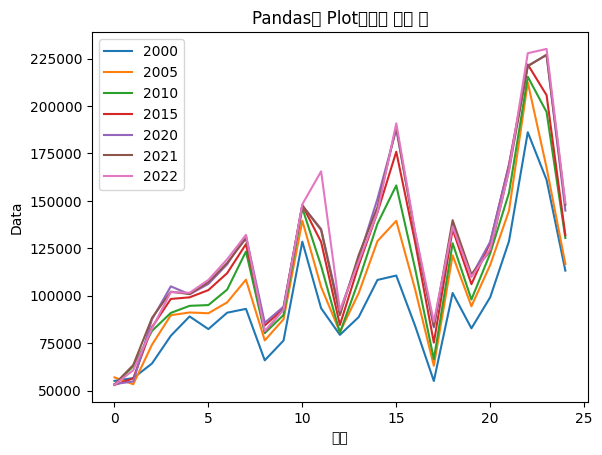

<Figure size 10000x15000 with 0 Axes>

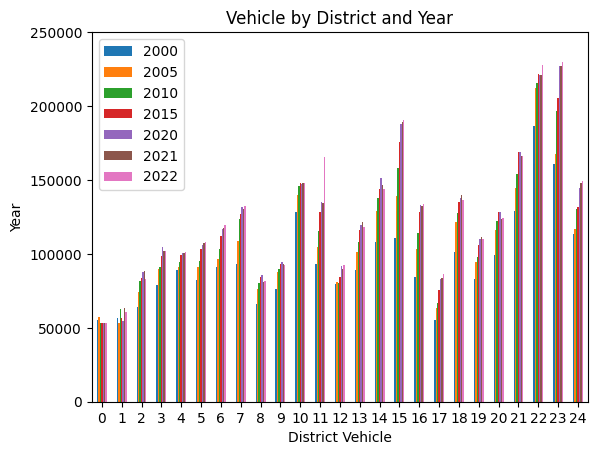

<Figure size 10000x15000 with 0 Axes>

In [63]:

df.plot()
plt.title("Pandas의 Plot메소드 사용 예")
plt.xlabel("시간")
plt.ylabel("Data")
plt.show()

df.plot.bar(rot=0)
plt.title("Vehicle by District and Year")
plt.xlabel("District Vehicle")
plt.ylabel("Year")
plt.ylim(0, 250000)
plt.figure(figsize=(100,150))

<Figure size 10000x15000 with 0 Axes>

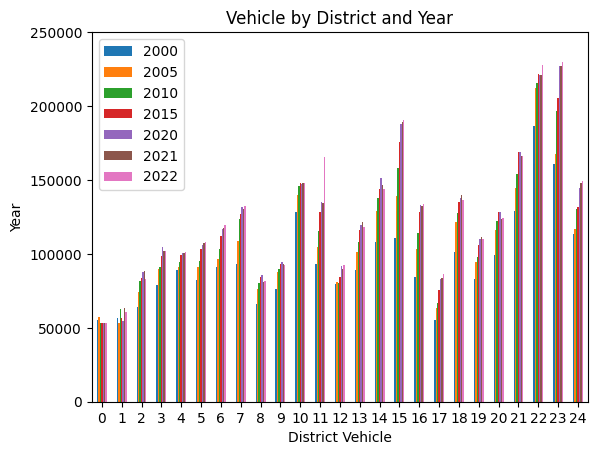

<Figure size 10000x15000 with 0 Axes>

In [60]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# df.plot()
# plt.title("Pandas의 Plot메소드 사용 예")
# plt.xlabel("시간")
# plt.ylabel("Data")
# plt.show()

df.plot.bar(rot=0)
plt.title("Vehicle by District and Year")
plt.xlabel("District Vehicle")
plt.ylabel("Year")
plt.ylim(0, 250000)
plt.figure(figsize=(100,150))

In [65]:
df = pd.read_csv('./서울시 불법주정차_전용차로 위반 단속 CCTV 위치정보.csv', encoding='utf-8')

# df= df.drop(0)
# df = df.set_index("자치구별")
print(df)

     ������CCTV�����ּ�        ����          �浵   ��ġ��  \
0         ��4�� 762-10   37.535891  126.870566   ��õ��   
1          ��4�� 797-8   37.532740  126.867191   ��õ��   
2           �ſ�2�� 496   37.524535  126.848224   ��õ��   
3         �ſ�7�� 928-1   37.522349  126.833529   ��õ��   
4            ��1�� 917   37.528982  126.874597   ��õ��   
...                ...         ...         ...     ...   
3944      �ʵ�2�� 116-1   37.557660  126.995650     �߱�   
3945          ���쵿 216   37.605234  127.104448   �߶���   
3946       ������ 96-9   37.575672  126.997551   ���α�   
3947       �Ŵ絿 251-160   37.566220  127.011929     �߱�   
3948  ������2�� 289-20  127.054985   37.547334  ������   

                    �ܼ�������         ���屸��  
0        ��4�� �����ʵ��б� �ֺ�  �ҹ�����������  
1             ��4�� ���а� �ֺ�  �ҹ�����������  
2        �ſ�2�� �簭�ʱ� �Ĺ� �ֺ�  �ҹ�����������  
3             �ſ�7�� �켺�� �ֺ�  �ҹ�����������  
4         ��1�� �Ķ��(SBS) �ֺ�  �ҹ�����������  
...                  